<a href="https://colab.research.google.com/github/juancaalcaraz/practicaML/blob/main/Mecanica_TensorFlow_1x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cómo obtener la dimensión y la forma de un tensor
## Podemos utilizar la función *tf.rank* para obtener la dimensión de un tensor. tf.rank devolverá  un tensor como salida y para obtener el valor real debemos evaluar dicho tensor.
## A demás podemos obtener la forma de un tensor, suponiendo que X es un tensor, mediante X.get_shape() que nos devolverá un objeto especial denominado *tensorshape*. Este objeto no se puede indexar ni dividir directamente, debemos convertirlo en una lista de Python mediante el método *as_list*      

In [ ]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

## Definir el gráfico de cálculo.
with tf.compat.v1.Graph().as_default() as g:
  ## Definir tensores
  t1 = tf.constant(np.pi)
  tf2 = tf.constant([1, 2, 3, 4])
  tf3 = tf.constant([[1,2], [3,4]])
  ## Obtener sus dimensiones.
  rank_t1 = tf.rank(t1)
  rank_t2 = tf.rank(tf2)
  rank_t3 = tf.rank(tf3)

  ## obtener sus formas
  s1 = t1.get_shape()
  s2 = tf2.get_shape()
  s3 = tf3.get_shape()
  print('Shapes: ', s1, s2, s3)

with tf.compat.v1.Session(graph=g):
  print('Rank: ', rank_t1.eval(), rank_t2.eval(), rank_t3.eval())


Shapes:  () (4,) (2, 2)
Rank:  0 1 2


## Definir marcadores de posición en tensorflow 1.x

In [ ]:
import tensorflow as tf

g = tf.Graph()

with tf.compat.v1.Graph().as_default() as g:
  tf_a = tf.compat.v1.placeholder(tf.int32, shape=[], name='tf_a')
  tf_b = tf.compat.v1.placeholder(tf.int32, shape=[], name='tf_b')
  tf_c = tf.compat.v1.placeholder(tf.int32, shape=[], name='tf_c')
  r1 = tf_a-tf_b
  r2 = 2*r1
  z = r2 + tf_c
  # En este código hemos definido 3 marcadores de posición.
  # In this code we have defined 3 placeholders.


## Alimentar marcadores de posición con datos.
## Cuando ejecutamos un nodo en el grafo, necesitamos crear un diccionario Python para alimentar los valores de los marcadores de posición con matrices de datos. este diccionario se pasa como argumento de entrda *feed_dict* a un método *run* de sesión.   

In [ ]:
with tf.compat.v1.Session(graph=g) as sess:
  feed = {tf_a: 1, tf_b : 2, tf_c: 3}
  print('z: ', sess.run(z, feed_dict=feed))

z:  1


### Tener matrices extras para los marcadores de posició no causa ningún error. Sin embargo, si necesita un marcador de posición para le ejecución de un nodo y este no se proporciona, se producirá un error en tiempo de ejecución.  

# Definir marcadores de posición para matrices de datos con diferentes tamaño de lote.

In [ ]:
import tensorflow as tf

g = tf.Graph()

with tf.compat.v1.Graph().as_default() as g:
  tf_x = tf.compat.v1.placeholder(tf.float32, shape=[None, 2], name='tf_x')
  x_mean = tf.reduce_mean(tf_x, axis=0, name='mean')


### Ahora podemos evaluar *x_mean* con entradas distintas para *x1* y *x2*

In [ ]:
import numpy as np
np.random.seed(42)
np.set_printoptions(precision=2)

with tf.compat.v1.Session(graph=g) as sess:
  x1 = np.random.uniform(low=0, high=1, size=(5,2))
  print('alimentación de datos con forma : ', x1.shape)
  print('resultado: ', sess.run(x_mean, feed_dict={tf_x: x1}))
  x2 = np.random.uniform(low=0, high=1, size=(10,2))
  print('alimentación de datos con forma : ', x2.shape)
  print('resultado: ', sess.run(x_mean, feed_dict={tf_x: x2}))

alimentación de datos con forma :  (5, 2)
resultado:  [0.38 0.66]
alimentación de datos con forma :  (10, 2)
resultado:  [0.39 0.4 ]


# Variables en TensorFlow 1.x

## Definir variables
## La variables en tensorFlow almacenan los parámetros de un modelo que puede ser actualizado durante el entrenamiento.
### tf.get_variable ya no se utiliza en TensorFlow 2.x

In [ ]:
import tensorflow as tf
import numpy as np

g1 = tf.Graph()
with tf.compat.v1.Graph().as_default() as g1:
  w = tf.Variable(np.array([[1,2,3,4],[5,6,7,8]]), name='w')
  print(w)

<tf.Variable 'w:0' shape=(2, 4) dtype=int64>


## Inicializar variables en TensorFlow 1.x
## El proceso de inicialización se refiere a la asignación de memoría para los tensores asociados y la asignacion de sus valores asociados. En tensorFlow 2.x no es necesario.

In [ ]:
with tf.compat.v1.Session(graph=g1) as sess:
  sess.run(tf.compat.v1.global_variables_initializer())
  print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


## Inicializar varias variables al mismo tiempo

In [ ]:
g2 = tf.Graph()
with tf.compat.v1.Graph().as_default() as g2:
  w1 = tf.Variable(1, name='w1')
  w2 = tf.Variable(2, name='w2')
  init_op = tf.compat.v1.global_variables_initializer()
  print(w1)
  print(w2)

<tf.Variable 'w1:0' shape=() dtype=int32>
<tf.Variable 'w2:0' shape=() dtype=int32>


In [ ]:
with tf.compat.v1.Session(graph=g2) as sess:
  sess.run(init_op)
  print('w1: ', sess.run(w1))
  print('w2: ', sess.run(w2))

w1:  1
w2:  2


## Alcance de variables

In [ ]:
g = tf.Graph()

with tf.compat.v1.Graph().as_default() as g:
  with tf.compat.v1.variable_scope('Net-A'):
    with tf.compat.v1.variable_scope('Layer-1'):
      w1 = tf.Variable(tf.compat.v1.random_normal(shape=(10,4)), name='weights')
    with tf.compat.v1.variable_scope('Layer-2'):
      w2 = tf.Variable(tf.compat.v1.random_normal(shape=(20,10)), name='weights')
  with tf.compat.v1.variable_scope('Net-B'):
    with tf.compat.v1.variable_scope('Layer-1'):
      w3 = tf.Variable(tf.compat.v1.random_normal(shape=(10,4)), name='weights')

  print(w1)
  print(w2)
  print(w3)

<tf.Variable 'Net-A/Layer-1/weights:0' shape=(10, 4) dtype=float32>
<tf.Variable 'Net-A/Layer-2/weights:0' shape=(20, 10) dtype=float32>
<tf.Variable 'Net-B/Layer-1/weights:0' shape=(10, 4) dtype=float32>


## Alcance de variables en TensorFlow 2.x

In [ ]:
import tensorflow as tf

class SimpleModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        # Define una variable dentro del alcance de este módulo
        self.weight = tf.Variable(2.0, name="weight")

    def __call__(self, x):
        return self.weight * x

# Crear una instancia de SimpleModule
module = SimpleModule()

# Ejecutar el módulo
output = module(3.0)
print(output)  # Devuelve 6.0 (2.0 * 3.0)

# Inspeccionar el nombre completo de la variable
print(module.weight.name)  # 'simple_module/weight:0'


tf.Tensor(6.0, shape=(), dtype=float32)
weight:0


## Reutilizar variables
### En el siguiente ejemplo suponemos que los datos de la fuente A se proporcionan mediante marcadores de posición y que la fuente B es la salida de una red de generadores. Construiremos la red de generadores llamando a la función *build_generator* dentro del alcance *generator* y añadiremos un clasificador llamando a la función *build_classifier* dentro del alcance *classifier*:  

In [ ]:
import tensorflow as tf
########################
##  funciones de ayuda  ##
#######################

def build_classifier(data, labels, n_clases=2, ):
  data_shape = data.get_shape().as_list()
  #weights = tf.Variable(name='weights', shape=(data_shape[1], n_clases), dtype=tf.float32)
  weights = tf.Variable(tf.random.normal(shape=(data_shape[1], n_clases)), name='weights', dtype=tf.float32)
  #bias = tf.Variable(name='bias', initializer=tf.zeros(shape=[n_clases]))
  bias = tf.Variable(tf.zeros(shape=[n_clases]), name='bias', dtype=tf.float32)
  logits = tf.add(tf.matmul(data, weights), bias, name='logits')
  return logits, tf.nn.softmax(logits)

In [ ]:
def build_generator(data, n_hidden):
  data_shape = data.get_shape().as_list()
  w1 = tf.Variable(tf.random.normal(shape=(data_shape[1], n_hidden)), name='w1')
  b1 = tf.Variable(tf.zeros(shape=n_hidden), name='b1')
  hidden = tf.add(tf.matmul(data, w1), b1, name='hidden_preactivation')
  hidden = tf.nn.relu(hidden, name='hidden_activation')
  w2 = tf.Variable(tf.random.normal(shape=(n_hidden, data_shape[1])), name='w2')
  b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name='b2')
  output = tf.add(tf.matmul(hidden, w2), b2, name='output')
  return output, tf.nn.sigmoid(output)

In [ ]:
#######################
## Crear el gráfico ###
#######################
batch_size = 64
g = tf.Graph()
with tf.compat.v1.Graph().as_default() as g:
  tf_X = tf.compat.v1.placeholder(shape=(batch_size, 100), dtype=tf.float32, name='tf_X')
  ## Crear el generador
  with tf.compat.v1.variable_scope('generator'):
    gen_out1 = build_generator(tf_X, n_hidden=256)
  ## Crear el clasificador
  with tf.compat.v1.variable_scope('classifier'):
    cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))
    # reutilizar el clasificador para datos generados.
    #tf.compat.v1.scope.reuse_variables()
    tf.compat.v1.get_variable_scope().reuse_variables()
    cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))



In [ ]:
""""
import tensorflow as tf

########################
##  funciones de ayuda  ##
#######################

def build_classifier(data, labels, n_clases=2):
    data_shape = data.get_shape().as_list()
    weights = tf.Variable(tf.random.normal(shape=(data_shape[1], n_clases)), name='weights', dtype=tf.float32)
    bias = tf.Variable(tf.zeros(shape=[n_clases]), name='bias', dtype=tf.float32)
    logits = tf.add(tf.matmul(data, weights), bias, name='logits')
    return logits, tf.nn.softmax(logits)

def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random.normal(shape=(data_shape[1], n_hidden)), name='w1')
    b1 = tf.Variable(tf.zeros(shape=[n_hidden]), name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1, name='hidden_preactivation')
    hidden = tf.nn.relu(hidden, name='hidden_activation')
    w2 = tf.Variable(tf.random.normal(shape=(n_hidden, data_shape[1])), name='w2')
    b2 = tf.Variable(tf.zeros(shape=[data_shape[1]]), name='b2')
    output = tf.add(tf.matmul(hidden, w2), b2, name='output')
    return output, tf.nn.sigmoid(output)

g = tf.Graph()
with g.as_default():
    tf_X = tf.compat.v1.placeholder(shape=(batch_size, 100), dtype=tf.float32, name='tf_X')
    ## Crear el generador
    with tf.compat.v1.variable_scope('generator'):
        gen_out1 = build_generator(tf_X, n_hidden=256)
    ## Crear el clasificador
    with tf.compat.v1.variable_scope('classifier'):
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=[batch_size]))
        # reutilizar el clasificador para datos generados.
        tf.compat.v1.get_variable_scope().reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=[batch_size]))
"""

### Hemos llamado la función *build_casiffier* dos veces. La primera llamada produce la creación de la red. Después llamamos a *get_variable_scope().reuse_variables()* y llamamos  de nuevo a esta función. Como resultado la segunda llamada reutiliza las variables.

# Crear un modelo de regresión
## Como ya hemos explorado marcadores de posición y variables, vamos a construir un modelo de ejemplo para el análisis de regresión.
### Vamos a definir a nuestros tensores codificandolos  de la siguiente manrea:
1. Entrada *x* : *tf_x* definido como marcador de posición.
2. Entrada *y* : *tf_y* definido como marcador de posición.
3. parámetro *w* del modelo : *weigth* definido como variable.
4. parámetro *b* del modelo : *bias* definido como variable.
5. parámetro y^ del modelo : *y_hat* devuelto por las operaciones de TensorFlow para calcular la predicción mediante el modelo de regresión.

In [5]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

with tf.compat.v1.Graph().as_default() as g:
  tf.random.set_seed(123)
  ## Texto por defecto
  tf_x = tf.compat.v1.placeholder(shape=(None), dtype=tf.float32, name='tf_x')
  tf_y = tf.compat.v1.placeholder(shape=(None), dtype=tf.float32, name='tf_y')

  # definir la variable (parámetros del modelo)
  weight = tf.Variable(tf.random.normal(shape=(1, 1), stddev=0.25), name='weight')
  bias = tf.Variable(0.0, name='bias')
  # crear el modelo
  y_hat = tf.add(weight * tf_x, bias, name='y_hat')

  # Calcular el coste
  cost = tf.reduce_mean(tf.square(tf_y - y_hat), name='cost')

  # Entrenar el modelo
  optim = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
  train_op = optim.minimize(cost, name='train_op')


<function matplotlib.pyplot.show(close=None, block=None)>

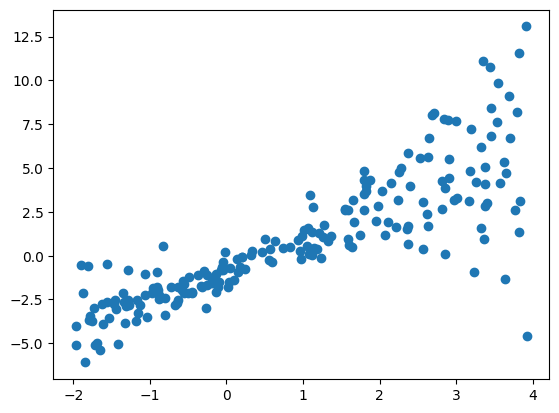

In [6]:
# Crear un conjunto de datos aleatorios para la regresión.
import matplotlib.pyplot as plt
np.random.seed(42)

def make_random_data():
  x = np.random.uniform(low=-2, high=4, size=200)
  y = []
  for t in x:
    r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3.0), size=None)
    y.append(r)
  return x, 1.726*x - 0.84 + np.array(y)

x_data, y_data = make_random_data()

plt.plot(x_data, y_data, 'o')
plt.show

In [7]:
## Divisiones de entrenamiento y prueba
x_train, y_train = x_data[:100], y_data[:100]
x_test, y_test = x_data[100:], y_data[100:]

n_epoch = 500
training_cost = []
with tf.compat.v1.Session(graph=g) as sess:
  sess.run(tf.compat.v1.global_variables_initializer())
  ## entrenar el modelo.
  for e in range(n_epoch) :
    c, _ = sess.run([cost, train_op], feed_dict={tf_x: x_train, tf_y: y_train})
    training_cost.append(c)
    if not e % 50:
      print('Epoch: %4d, cost=%.4f' % (e, c))

Epoch:    0, cost=13.3626
Epoch:   50, cost=8.7108
Epoch:  100, cost=6.5913
Epoch:  150, cost=5.6031
Epoch:  200, cost=5.1234
Epoch:  250, cost=4.8753
Epoch:  300, cost=4.7349
Epoch:  350, cost=4.6467
Epoch:  400, cost=4.5854
Epoch:  450, cost=4.5392


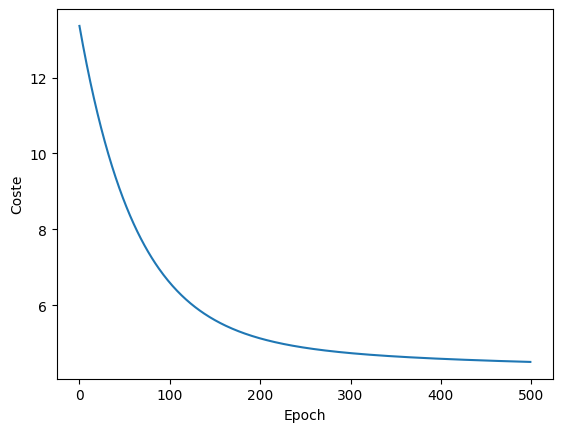

In [8]:
plt.plot(training_cost)
plt.ylabel('Coste')
plt.xlabel('Epoch')
plt.show()